### 統計學習與深度學習 (Fall, 2020)
### Homework 1

### 第一題 [myknn_regressor]
Q1.1 Create your myknn_regressor based on the skeleton.

撰寫一個KNN_Regressor將分為fit()和predict()兩個部分。
* 因為KNN不需要訓練，因此fit()就是單純的將(x, y)的訓練資料存入模型。
* predict()的部分會先檢驗「需不需要且符不符合remove outliers的資格」，接著計算每個test x和Train x的距離，選出最近的k個。再平均他們的y值，以進行test y的預測。

In [1]:
class myknn_regressor():
    def __init__(self, n_neighbors = 10, mean_type = "equal_weight"): #default
        """mean_type can be equal_weight or remove_outliers.
                              equal_weight use the same weight for all neighbors.
                              remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 - 1.5IQR]."""
        ### Add your code here ###
        self.x_train = []
        self.y_train = []
        self.k = n_neighbors
        self.mean_type = mean_type
        self.y_predict = []
        
    #No need to train, just record the points
    def fit(self, x_train, y_train):
        ### Add your code here ###
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        """use remove_outliers only if k>=10"""
        ### Add your code here ###
        #Remove outliers
        if self.k >= 10 and self.mean_type == 'remove_outliers':
            #Find outliers in y_train
            Q1 = np.percentile(self.y_train,25)
            Q3 = np.percentile(self.y_train,75)
            IQR = Q3 - Q1
            lowBand = Q1 - 1.5*IQR
            highBand = Q3 + 1.5*IQR
            
            #Remove in both x and y train
            outlier = []
            for i in range(len(self.y_train)):
                if self.y_train[i] < lowBand or self.y_train[i] > highBand:
                    outlier.append(i)
            
            #Delete by rows
            self.y_train = np.delete(self.y_train, outlier)
            self.x_train = np.delete(self.x_train, outlier, axis=0)
            
        #kNN
        #Compute (Euclidean) distance with all the x_train
        for x1 in x_test:
            dist = []
            for x2 in self.x_train:
                dist.append(np.linalg.norm(x1-x2))
                
            #Get the closest k neighbors of x1
            dist = np.array(dist)
            k_neighbors = dist.argsort()[:self.k]
            
            #Predict y of x1
            y_neighbors = self.y_train[k_neighbors]
            self.y_predict.append(sum(y_neighbors)/self.k)
            
        return self.y_predict

* init()定義model的attribute。(使用者也可以透過.(attribute)取得init()中有定義的attribute的值)
* fit()存入(x, y)的訓練資料。
* predict()先用if:判定是remove_outliers與否，再以橫向刪除的方法將計算後y值為outlier的資料刪掉。KNN的部分先計算test x和所有train x的歐式距離，接著選出最近的k個，對其y值予以平均，最後回傳y_predict的list。

Q1.2 Load data from msd_data1.pickle. You should standardize all feature values to have a zero mean and unit variance before training a KNN model.  Make predictions using $k=20$ and "equal_weight" $f$. List the RMSE and the first 20 predictions in the test data. 

為了對msd_data1.pickle中的資料進行預測，
* 首先讀取、標準化和分割訓練、測試集。
* 接著呼叫Q1.1撰寫的myknn_regressor，並印出前20個預測結果和模型預測test data的RMSE。

In [2]:
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [3]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

print(ypred[0:10])
print(ypred[10:20])
#Calculate RMSE
difference = (np.array(ypred)-Y_test)**2
RMSE = np.sqrt(np.mean(difference))
print(RMSE)

[1993.35, 1993.8, 2000.65, 1991.5, 1992.8, 1998.5, 1988.1, 1991.65, 2002.25, 2003.0]
[2000.5, 1998.65, 1995.55, 1997.2, 1995.05, 1997.4, 1992.15, 2000.45, 2003.2, 1995.75]
10.25126451549596


* RMSE約為10.25。
* 相比於分布在1990~2000的觀測值，誤差值約為0.5138%(=10.25/1995)
* 但10年的誤差其實不低。

Q1.3 Load data from msd_data1.pickle. Standardized all feature values so that all features have a zero mean and unit variance.  Make predictions using $k=20$ and "remove_outliers" $f$. List the RMSE and the first 20 predictions in the testing data. 

In [4]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(X_train, Y_train)
ypred = myknn.predict(X_test)

print(ypred[0:10])
print(ypred[10:20])
difference = (np.array(ypred)-Y_test)**2
RMSE = np.sqrt(np.mean(difference))
print(RMSE)

[1999.8, 1993.8, 2000.65, 1991.9, 1994.3, 2000.35, 1994.7, 1999.55, 2002.25, 2003.0]
[2000.5, 1998.65, 2000.55, 1997.2, 1997.85, 1997.4, 1999.3, 2003.8, 2003.2, 1996.95]
10.350213806165229


* RMSE約為10.35，值得注意的是比不remove outliers來得略高。（代表在大部分有outlier為鄰居的test data中，outlier比其他人更接近test x）
* 相比於分布在1990~2000的觀測值，誤差值約為0.5188%(=10.35/1995)
* 但10年的誤差其實不低。

### 第二題 [Tuning the Hyper-parameter]
Hyper-parameter tuning is an important skill required in many model training tasks. We are going to consider three settings in this question. Use the KNN regressor from klearn.neighbors.KNeighborsRegressor for the first two settings, and your myknn_regressor for the third setting. 

For each setting, use the data from msd_data1.pickle to train and test the KNN models. Compute the RMSE on the testing dataset using $k=1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200$. In the first case, all feature values are standardized to have unit variances and zero means. As for the second case, do not apply feature scaling. The third case uses standardized features and adopted myknn_regressor with "remove_outlier"（remove_outliers才對） $f$ to make predictions. 

For each setting, plot a curve that shows the relations between $k$ (x-axis) and RMSE (y-axis). If possible, plot the three curves in the same figure to visually inspect their dynamics. Discuss your observations. 

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

k_list = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 80, 100, 120, 140, 160, 180, 200]

In [4]:
# First case
case_1 = []
for k in k_list:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    
    ypred = neigh.predict(X_test)
    difference = (np.array(ypred)-Y_test)**2
    RMSE = np.sqrt(np.mean(difference))
    case_1.append(RMSE)

In [ ]:
for i in range(len(k_list)):
    print("k="+str(k_list[i])+", RMSE: "+str(case_1[i]))

In [8]:
#Third case
case_3 = []
for k in k_list:
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(X_train, Y_train)
    
    ypred = myknn.predict(X_test)
    difference = (np.array(ypred)-Y_test)**2
    RMSE = np.sqrt(np.mean(difference))
    case_3.append(RMSE)
    print("k="+str(k)+", completed")

k=1, completed
k=2, completed
k=3, completed
k=4, completed
k=5, completed
k=10, completed
k=15, completed
k=20, completed
k=25, completed
k=30, completed
k=35, completed
k=40, completed
k=45, completed
k=50, completed
k=55, completed
k=60, completed
k=80, completed
k=100, completed
k=120, completed
k=140, completed
k=160, completed
k=180, completed
k=200, completed


In [ ]:
for i in range(len(k_list)):
    print("k="+str(k_list[i])+", RMSE: "+str(case_3[i]))

In [5]:
# Second case
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

# Do not apply feature scaling
doscaling = 0

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [6]:
case_2 = []
for k in k_list:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, Y_train)
    
    ypred = neigh.predict(X_test)
    difference = (np.array(ypred)-Y_test)**2
    RMSE = np.sqrt(np.mean(difference))
    case_2.append(RMSE)

In [ ]:
for i in range(len(k_list)):
    print("k="+str(k_list[i])+", RMSE: "+str(case_2[i]))

In [9]:
for i in range(len(k_list)):
    print("k="+str(k_list[i])+", RMSE: "+str(case_1[i])+", "+str(case_2[i])+", "+str(case_3[i]))

k=1, RMSE: 13.911074724837043, 14.923638966418345, 13.911074724837043
k=2, RMSE: 12.068170946750795, 12.777499755429464, 12.068170946750795
k=3, RMSE: 11.389120864846157, 12.075674967716129, 11.389120864846157
k=4, RMSE: 11.1123354880961, 11.767805657810635, 11.1123354880961
k=5, RMSE: 10.894692897614565, 11.466392632384432, 10.894692897614565
k=10, RMSE: 10.425998912973919, 11.07746090040493, 10.399367608978284
k=15, RMSE: 10.318171959828572, 10.888979137947995, 10.355923121755186
k=20, RMSE: 10.25126451549596, 10.797788546734928, 10.350213806165229
k=25, RMSE: 10.23762722509469, 10.79007301797969, 10.327134691352354
k=30, RMSE: 10.215977156359507, 10.75026561256701, 10.322827078319627
k=35, RMSE: 10.205243203546763, 10.717738719772289, 10.326901136102249
k=40, RMSE: 10.204332770527754, 10.714437504678756, 10.324147452695549
k=45, RMSE: 10.207243171822855, 10.698494013475852, 10.340451741690119
k=50, RMSE: 10.206033712139762, 10.69110105960404, 10.342837070488285
k=55, RMSE: 10.208862

Text(0, 0.5, 'RMSE of the model')

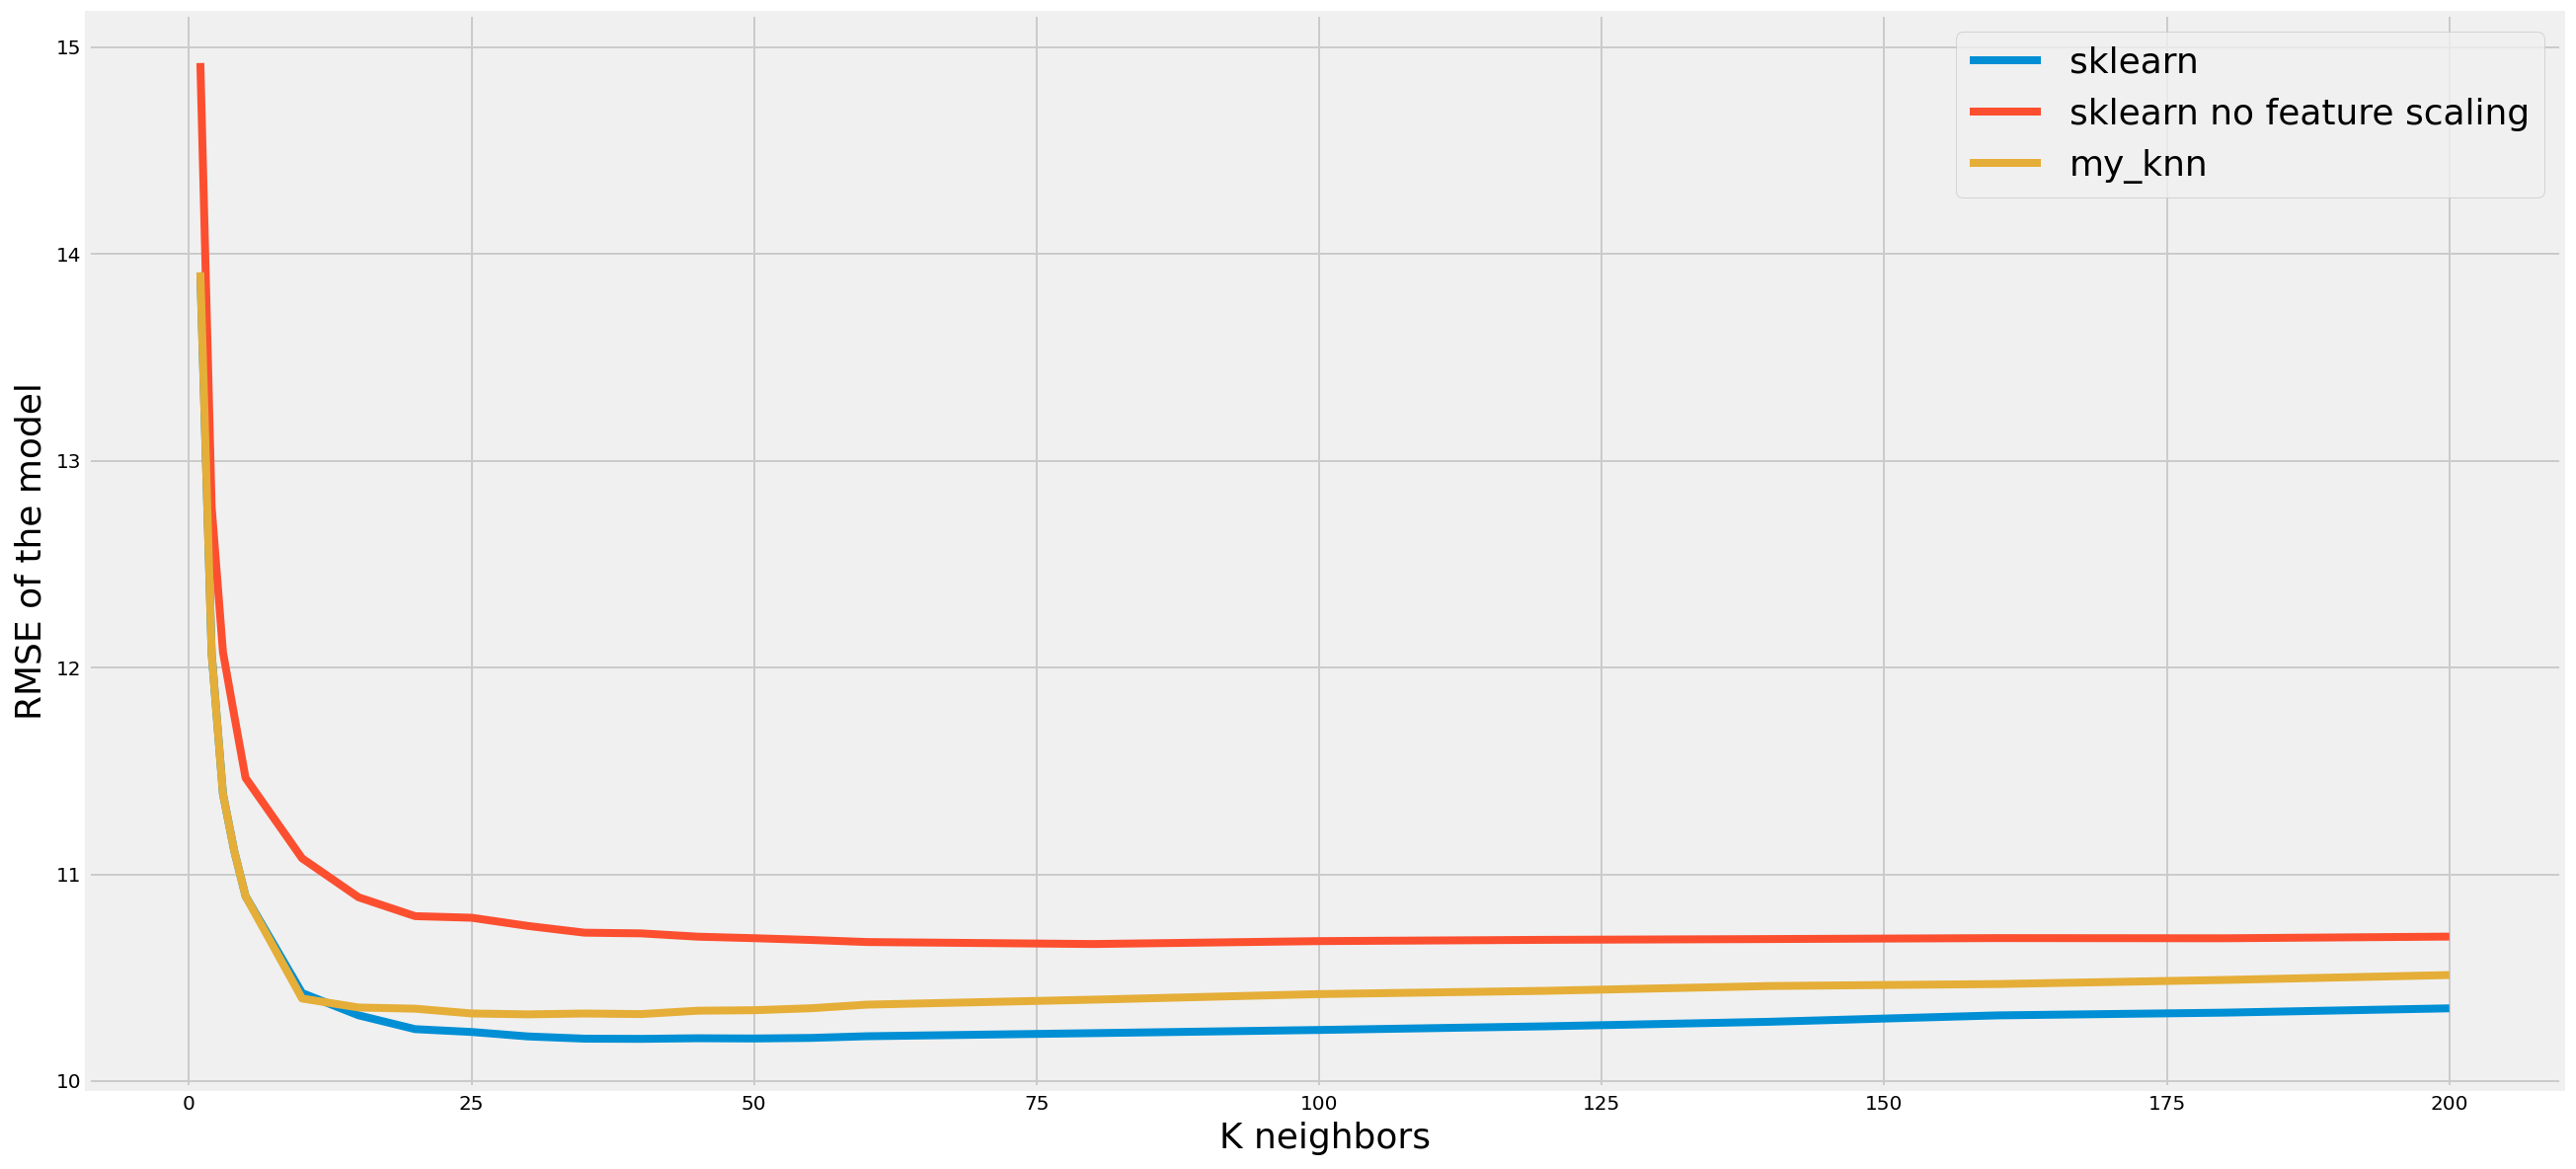

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(k_list, case_1, label = 'sklearn')
plt.plot(k_list, case_2, label = 'sklearn no feature scaling')
plt.plot(k_list, case_3, label = 'my_knn')
plt.legend(loc='upper right', fontsize=18)
plt.xlabel('K neighbors', fontsize=18)
plt.ylabel('RMSE of the model', fontsize=18)

* 首先，我們可以發現Case 1: sklearn + standardized feature的結果，和Q1.2中my_knn equal weight在k=20的RMSE完全吻合。另外，也和my_knn k<10不行remove outliers（意即equal weight）的結果一樣，可見兩者是一樣的算法。
* 在k>=10後，remove outliers的表現較Case1來得差，證明對KNN來說，越多樣本有越好的預測效果。（也代表在大部分有outlier為鄰居的test data中，outlier比其他人更接近test x）
* Case2的表現一直都最差，代表好的（合理地）preprocessing能有效降低RMSE。
* 三者的RMSE最小值分別在K=40, 80和30，代表這是最適合他們的鄰居數量。（多了反而會增加誤差）
* my_knn相比算法優化的sklearn慢上許多，顯見時間複雜度在大樣本上的影響。

### 第三題 [Lasso Regression]
Q3.1 基於本題給的$L$，推導新的Coordinate Descent with Soft Thresholding公式 

$$
L = \frac{1}{2n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0)^2 + \lambda [\sum_{j=1}^{M} |w_j|]
$$
和投影片相比，這邊的第一項多除了n，因此在對$w_j$偏微分（fix其他 $w$）後，第一項會多除1/n，如下所示：
$$
\frac{dL}{dw_i} = \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0) (- \mathbf{x}_{ij}) + \lambda sgn (w_j)
$$
上式平方的微分保留一次項，另一項（$g(x)$）和$w_j$無關的都捨棄。又
$$
\mathbf{w}^T \mathbf{x}_i = \mathbf{w}^T_{-j} \mathbf{x}_{i, -j} + \mathbf{w}_j \mathbf{x}_{i, j}
$$
因此改寫
$$
\frac{dL}{dw_i} = \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T \mathbf{x}_i - w_0) (- \mathbf{x}_{ij}) + \lambda sgn (w_j)
$$
$$
= \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i, -j} - \mathbf{w}_i \mathbf{x}_{i, j} - w_0) (- \mathbf{x}_{ij}) + \lambda sgn (w_j)
$$
$$
= \frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^T_{-j} \mathbf{x}_{i, -j} - w_0) (- \mathbf{x}_{ij}) + \frac{1}{n} w_j \sum_{i=1}^n \mathbf{x}_{ij}^2 + \lambda sgn (w_j)
$$
令無關的term fix，解方程式=0
$$
\frac{1}{n} \sum_{i=1}^n (y_i - \mathbf{w}^{T}_{-j} \mathbf{x}_{i, -j} - w_0) (- \mathbf{x}_{ij}) + \frac{1}{n}  w_j \sum_{i=1}^n \mathbf{x}_{ij}^2 + \lambda sgn (w_j) = 0
$$
對中間的$w_j$求解
$$
w_j = \frac{\sum_{i=1}^n (y_i - \mathbf{w}^{T}_{-j} \mathbf{x}_{i, -j} - w_0) (\mathbf{x}_{ij}) - n \lambda sgn (w_j)}{\sum_{i=1}^n \mathbf{x}_{ij}^2}
$$
令
$$
w_j^{*} = \frac{\sum_{i=1}^n (y_i - \mathbf{w}^{T}_{-j} \mathbf{x}_{i, -j} - w_0) (\mathbf{x}_{ij})}{\sum_{i=1}^n \mathbf{x}_{ij}^2}
$$
因此歸納出：  
$w_j > 0$（或$w_j^{*} > \frac{n \lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2}$）,則$w_j = w_j^{*} - \frac{n \lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2}$  
$w_j < 0$（或$w_j^{*} < \frac{-n \lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2}$）,則$w_j = w_j^{*} + \frac{n \lambda}{\sum_{i=1}^n \mathbf{x}_{ij}^2}$  
$w_j = 0$

Q3.2 使用給定個骨架建構你的mylasso。
* fit()中分成"Initial by Ridge", "Coordinate Descent with Soft Thresholding"兩個部分
* Coordinate Descent with Soft Thresholding又分為算$wj*$，針對$wj*$的大小算$L$，計算$L$（先算$L'$在還原回$L$）的差距三個部分
* Keep_traindata會保留x_train和y_train。（False則這兩個參數為空）
* verbose會輸出Q3.3的統計量。

In [2]:
class mylasso():
    def __init__(self, lamcoef = 0.1, max_iter=1000, tol=1e-6, const_regu = False):
        """lamcoef: the regularization coefficient
           max_iter: maximum number of iteration for model training
           tol: tolerance for the stopping criteria for model training
           const_regu: whether the constant term should be regularized, default to False
           """
        ### Add your code here ###
        self.lamcoef = lamcoef
        self.max_iter = max_iter
        self.tol = tol
        self.const_regu = const_regu
        self.w = [] # Fit by train data
        # For keep training data
        self.x_train = []
        self.y_train = []
        # For output statistics
        self.stat = []

    def fit(self, x_train, y_train, winit = "ridge", keep_traindata = True, verbose = False):
        """Fit a Lasso model
           x_train: a numpy matrix that contains training features
           y_train: a numpy matrix that contains the label
           winit: how weights are initialized, default to "ridge", ridge regression
           keep_traindata: whether the object is going to keep training data after the training process completed
           verbose: output a lot of message"""
        ### Add your code here ###
        
        # Add constant to x
        constant = np.ones((x_train.shape[0], 1))
        x_train = np.append(x_train, constant, axis = 1)
        
        # Initialized weight
        if winit == 'ridge':
            
            # Use ridge regression to compute weight
            alpha = 1 # if alpha = 0, Acts identical to Linear Regression
            n, m = x_train.shape
            I = np.identity(m) # m*m unit matrix
            # Dot can multiply scalar, matmul can't
            self.w = np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train)+ alpha * I), x_train.T), y_train)
            
        # Lasso regression
        iteration = 0
        # Initialize L by Ridge
        L = np.sum(((y_train - np.matmul(x_train, self.w))**2))/(2*len(y_train))
        w = np.absolute(self.w)
        L += self.lamcoef*np.sum(w[:-1]) # - w0
        
        L_dif = 100
        dif = []
        
        # Precompute sum of each columns(Xij)
        xij = np.sum(x_train*x_train, axis = 0)
        
        while(L_dif > self.tol and iteration < self.max_iter):
            
            old_weights = np.copy(self.w)
            
            # Compute new W
            # Get the each best wj by fix all other w
            for j in range(len(self.w)):
                # Compute wj Star
                x_k = np.delete(x_train,j,1) # Remove the j variable i.e. j column
                w_k = np.delete(self.w,j) # Remove the weight j
                predict_k = np.matmul(x_k, w_k)
                residual = y_train - predict_k
                star_j = np.sum(x_train[:,j]*residual) # j column * residual
                # Compute wj
                if star_j > self.lamcoef*len(y_train):
                    self.w[j] = (star_j - (self.lamcoef*len(y_train)))/xij[j]
                elif star_j < -self.lamcoef*len(y_train):
                    self.w[j] = (star_j + (self.lamcoef*len(y_train)))/xij[j]
                elif star_j > -self.lamcoef*len(y_train) and star_j < self.lamcoef*len(y_train):
                    self.w[j] = 0
            
            # Compute L dif
            L_old = L
            
            # Compute new L
            dif = (y_train - np.matmul(x_train, self.w))**2
            L = np.sum(dif/(2*len(y_train)))
            w = np.absolute(self.w)
            L += self.lamcoef*np.sum(w[:-1]) # - w0
            
            L_dif = L_old - L
            #print(L_dif)
            iteration += 1
            
        # Calculate statistics
        RMSE = np.sqrt(np.mean(dif))
        MAE = np.mean(np.absolute(dif))
        nonZero = np.count_nonzero(self.w)
        AWS = np.mean(np.absolute(self.w))
        self.stat = [L, RMSE, MAE, nonZero, AWS]
        
        if keep_traindata == True:
            self.x_train = x_train
            self.y_train = y_train
        
        
        if verbose == True:
            print("Training Loss   : ",L)
            print("RMSE            : ",RMSE)
            print("MAE             : ",MAE)
            print("Intercept       : ",self.w[-1])
            print("Feature Weights:")
            print(self.w[:-1])
            print("Non-zero Weights: ",nonZero)
            
        
    def predict(self, x_test):
        """Make prediction using trained model"""
        
        ### Add your code here ###
        
        # Add constant to x
        constant = np.ones((x_test.shape[0], 1))
        x_test = np.append(x_test, constant, axis = 1)
        
        # Compute y by multiply X and weight + w0
        y_pred = np.matmul(x_test, self.w) # X*w become an n x 1 matrix
        return(y_pred)

Q3.3 載入資料集，並且使用訓練資料計算Lasso Regression的權重，設定lamcoef = 0.1，其他參數使用預設值。列出Training Loss、Root Mean Squared Error (RMSE) in Training Data、Mean Absolute Error (MAE) in Training Data、Intercept (截距項)、Feature Weights (除了截距項的所有權重)、非零權重的個數。為了讓結果容易閱讀，請使用`np.set_printoptions(suppress=True)`關閉Scientific Notation。

以下會透過Verbose=True來輸出統計量。

In [3]:
import pickle
from sklearn import preprocessing
import numpy as np

#Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

In [4]:
np.set_printoptions(suppress=True)
# Fit my lasso
mlo = mylasso(lamcoef = 0.1)
mlo.fit(X_train, Y_train, verbose=True)

Training Loss   :  49.89340408687167
RMSE            :  9.720013849577956
MAE             :  94.47866923598728
Intercept       :  1998.166
Feature Weights:
[ 4.65185652 -2.45673316 -1.06196535  0.         -0.34274831 -2.94853382
  0.         -0.39970122 -0.42653836  0.         -0.23498694 -0.39491095
  0.50307882  0.         -0.34206989  0.61674787  0.15722908  0.43488038
  0.43595271  1.12940982  0.40663504  0.          1.77743545  0.
 -0.16842724  0.07833503  0.66390595  0.01297777  0.15350911  0.
 -0.21762143 -0.22189079  0.         -0.00275484 -0.01707791 -0.25994995
  0.          0.28969343  0.34893388  0.         -0.26112557 -0.14488594
 -0.00995355  0.03497788 -0.03984371  0.          0.00299422 -0.17804202
  0.          0.06494346  0.27076601  0.          0.          0.
  0.          0.         -0.63813054  0.23761498 -0.19016322  0.
 -0.18875512  0.         -0.13590674  0.06127542 -0.26618983  0.
  0.          0.         -0.03099304  0.         -0.19276624  0.01221452
  0.2073

Q3.4 使用上一小題的模型計算測試資料的預測值。列出前五筆資料的預測年分、Test RMSE、Test MAE。

In [5]:
ypred = mlo.predict(X_test[:5])
print(ypred)
dif = np.array(ypred)-Y_test[:5]
RMSE = np.sqrt(np.mean(dif**2))
MAE = np.mean(np.absolute(dif))
print("Test RMSE: ",RMSE)
print("Test MAE : ",MAE)

[1991.83191515 1998.97198926 2001.66290537 1991.20317324 1994.32657094]
Test RMSE:  7.388959784687148
Test MAE :  6.801382585179317


* 誤差約為0.37%（7.389/1995），表現較KNN來得好。
* 但7年的誤差其實還是不低。

Q3.5 使用下面的$\lambda$訓練模型: 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2。記錄每一個$\lambda$的Training Loss、Number of Nonzero Weights、Average Weight Size (Mean of Absolute Weight)、Training RMSE、Test RMSE。將所有的結果列表、畫折線圖、並寫下你對結果的觀察。

以下會在計算後將各個統計量分別輸出並繪圖，以利比較不同lambda的差異。

In [6]:
lambda_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2]
trainLoss = []
nonZero = []
AWS = []
trainRMSE = []
testRMSE = []

In [7]:
for lamb in lambda_list:
    # Fit model by each lambda
    mlo = mylasso(lamcoef = lamb)
    mlo.fit(X_train, Y_train)
    # Keep statistics
    trainLoss.append(mlo.stat[0])
    nonZero.append(mlo.stat[3])
    AWS.append(mlo.stat[4])
    trainRMSE.append(mlo.stat[1])
    # Predict y
    ypred = mlo.predict(X_test)
    dif = (np.array(ypred)-Y_test)**2
    RMSE = np.sqrt(np.mean(dif))
    testRMSE.append(RMSE)

In [14]:
'''
Training Loss
'''
for i in range(len(lambda_list)):
    print("When lambda =",lambda_list[i],"Training Loss =",trainLoss[i])

When lambda = 0.0001 Training Loss = 46.5704617866306
When lambda = 0.0005 Training Loss = 46.58737756961449
When lambda = 0.001 Training Loss = 46.6084605500907
When lambda = 0.005 Training Loss = 46.77466846976581
When lambda = 0.01 Training Loss = 46.976875285482286
When lambda = 0.05 Training Loss = 48.418639781400046
When lambda = 0.1 Training Loss = 49.89340408687167
When lambda = 0.5 Training Loss = 56.50068820086107
When lambda = 1 Training Loss = 60.38932371917636
When lambda = 2 Training Loss = 63.49213127709899


Text(0, 0.5, 'Training Loss')

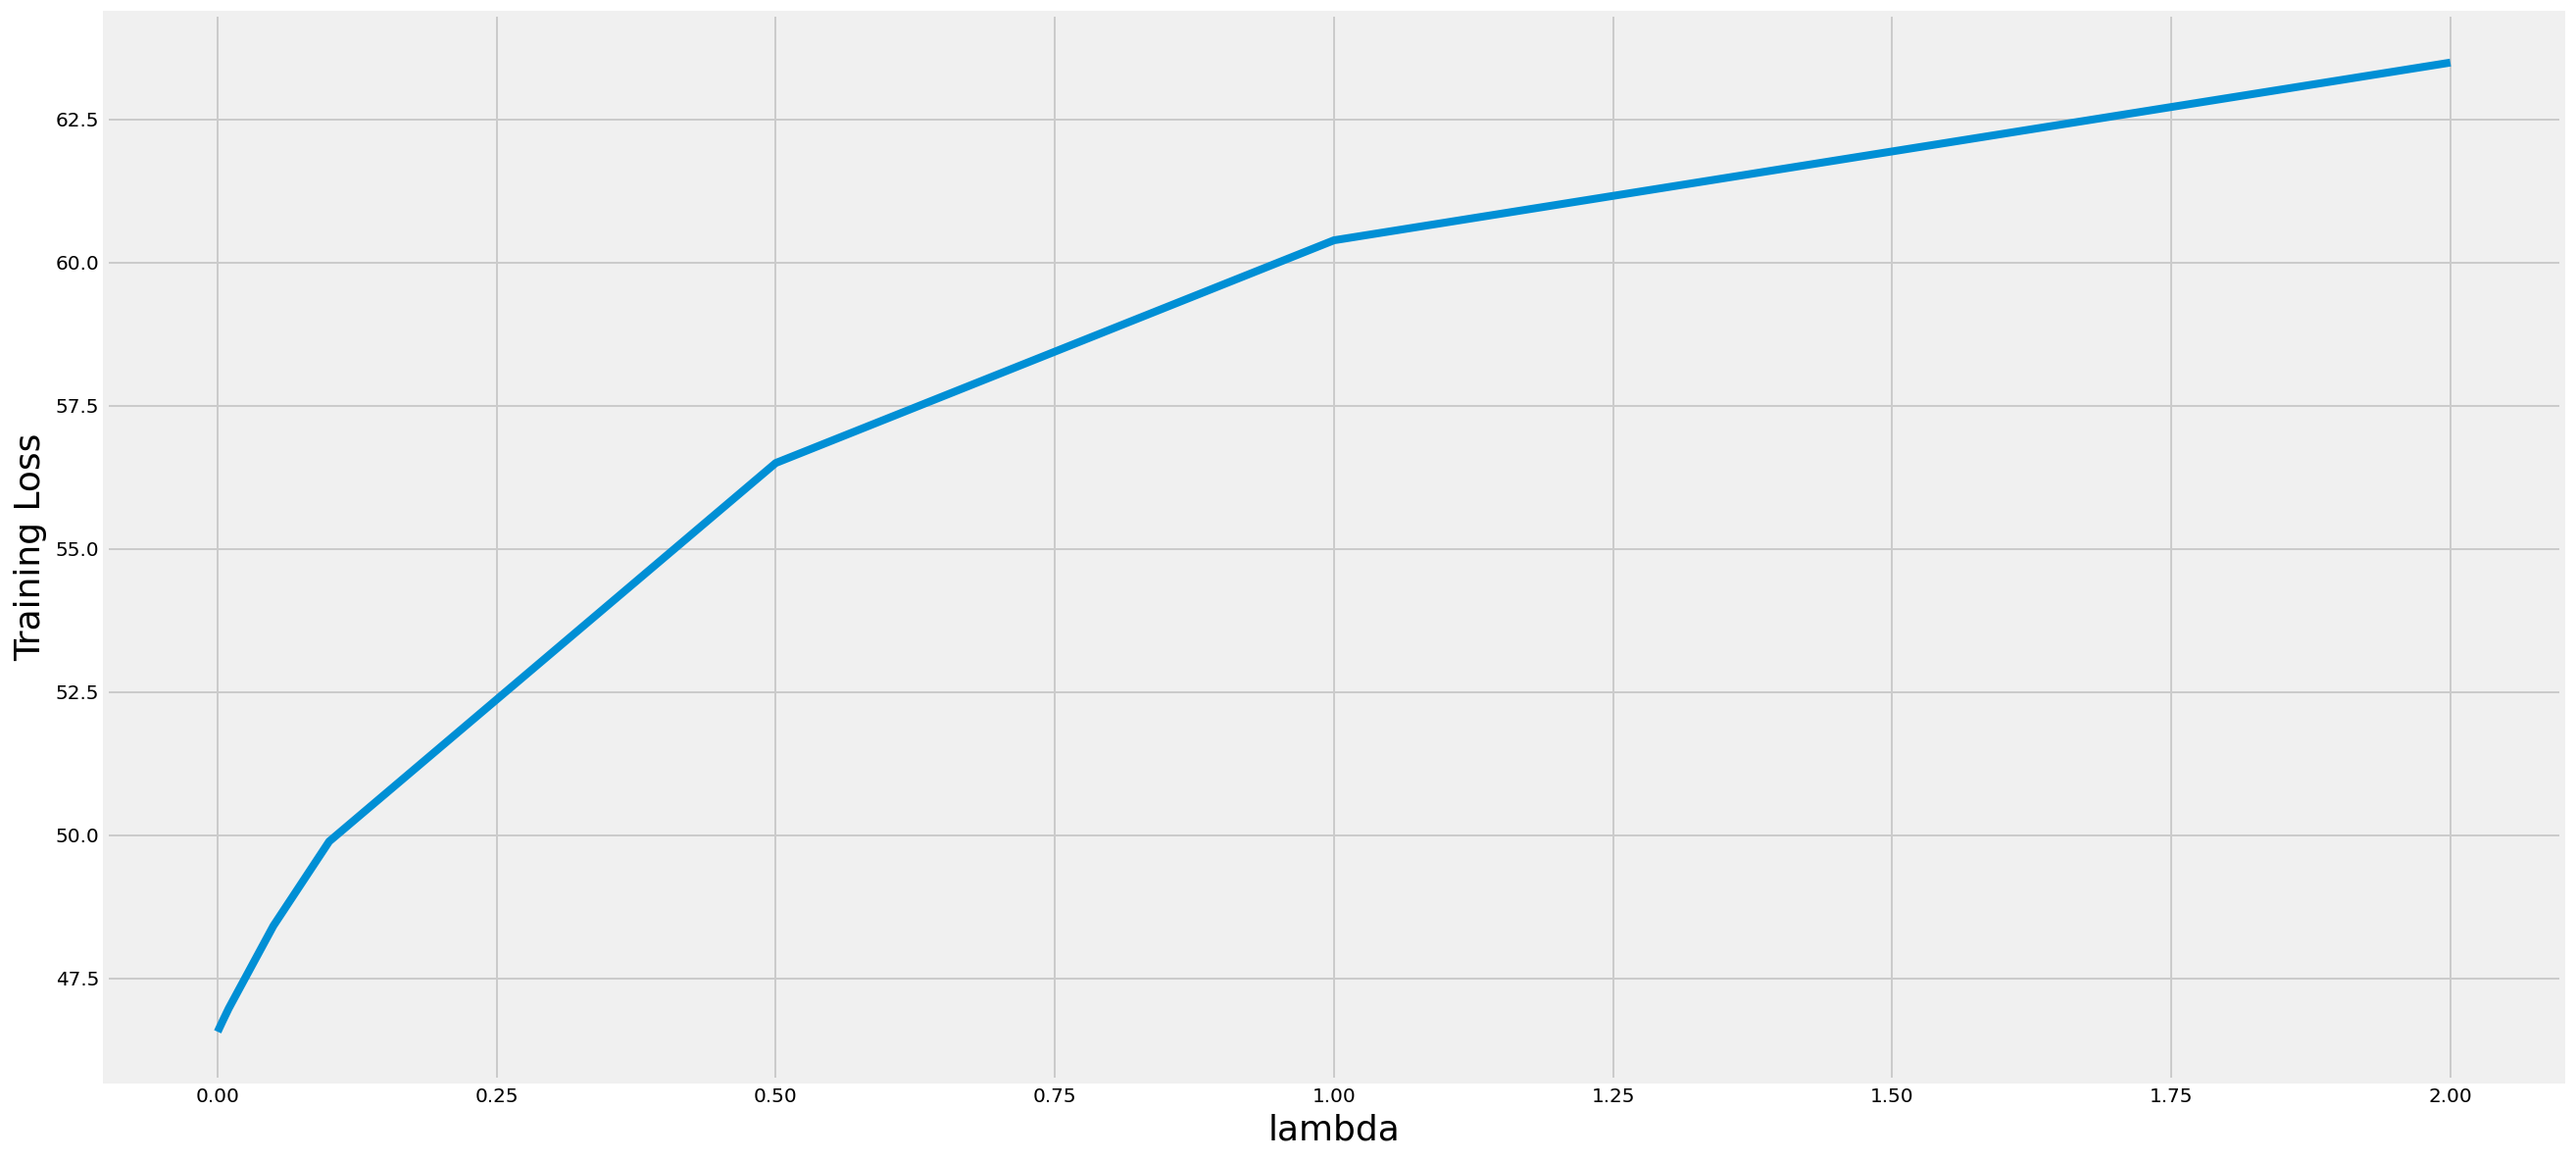

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(lambda_list, trainLoss)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Training Loss', fontsize=18)

Training Loss隨著lambda變大而增加。（lambda*$|wj|$上升，模型會傾向讓$wj$趨近於0，使絕對值總和變小）

In [15]:
'''
Number of Nonzero Weights
'''
for i in range(len(lambda_list)):
    print("When lambda =",lambda_list[i],"Number of Nonzero Weights =",nonZero[i])

When lambda = 0.0001 Number of Nonzero Weights = 91
When lambda = 0.0005 Number of Nonzero Weights = 91
When lambda = 0.001 Number of Nonzero Weights = 91
When lambda = 0.005 Number of Nonzero Weights = 90
When lambda = 0.01 Number of Nonzero Weights = 88
When lambda = 0.05 Number of Nonzero Weights = 77
When lambda = 0.1 Number of Nonzero Weights = 60
When lambda = 0.5 Number of Nonzero Weights = 17
When lambda = 1 Number of Nonzero Weights = 5
When lambda = 2 Number of Nonzero Weights = 2


Text(0, 0.5, 'Number of Nonzero Weights')

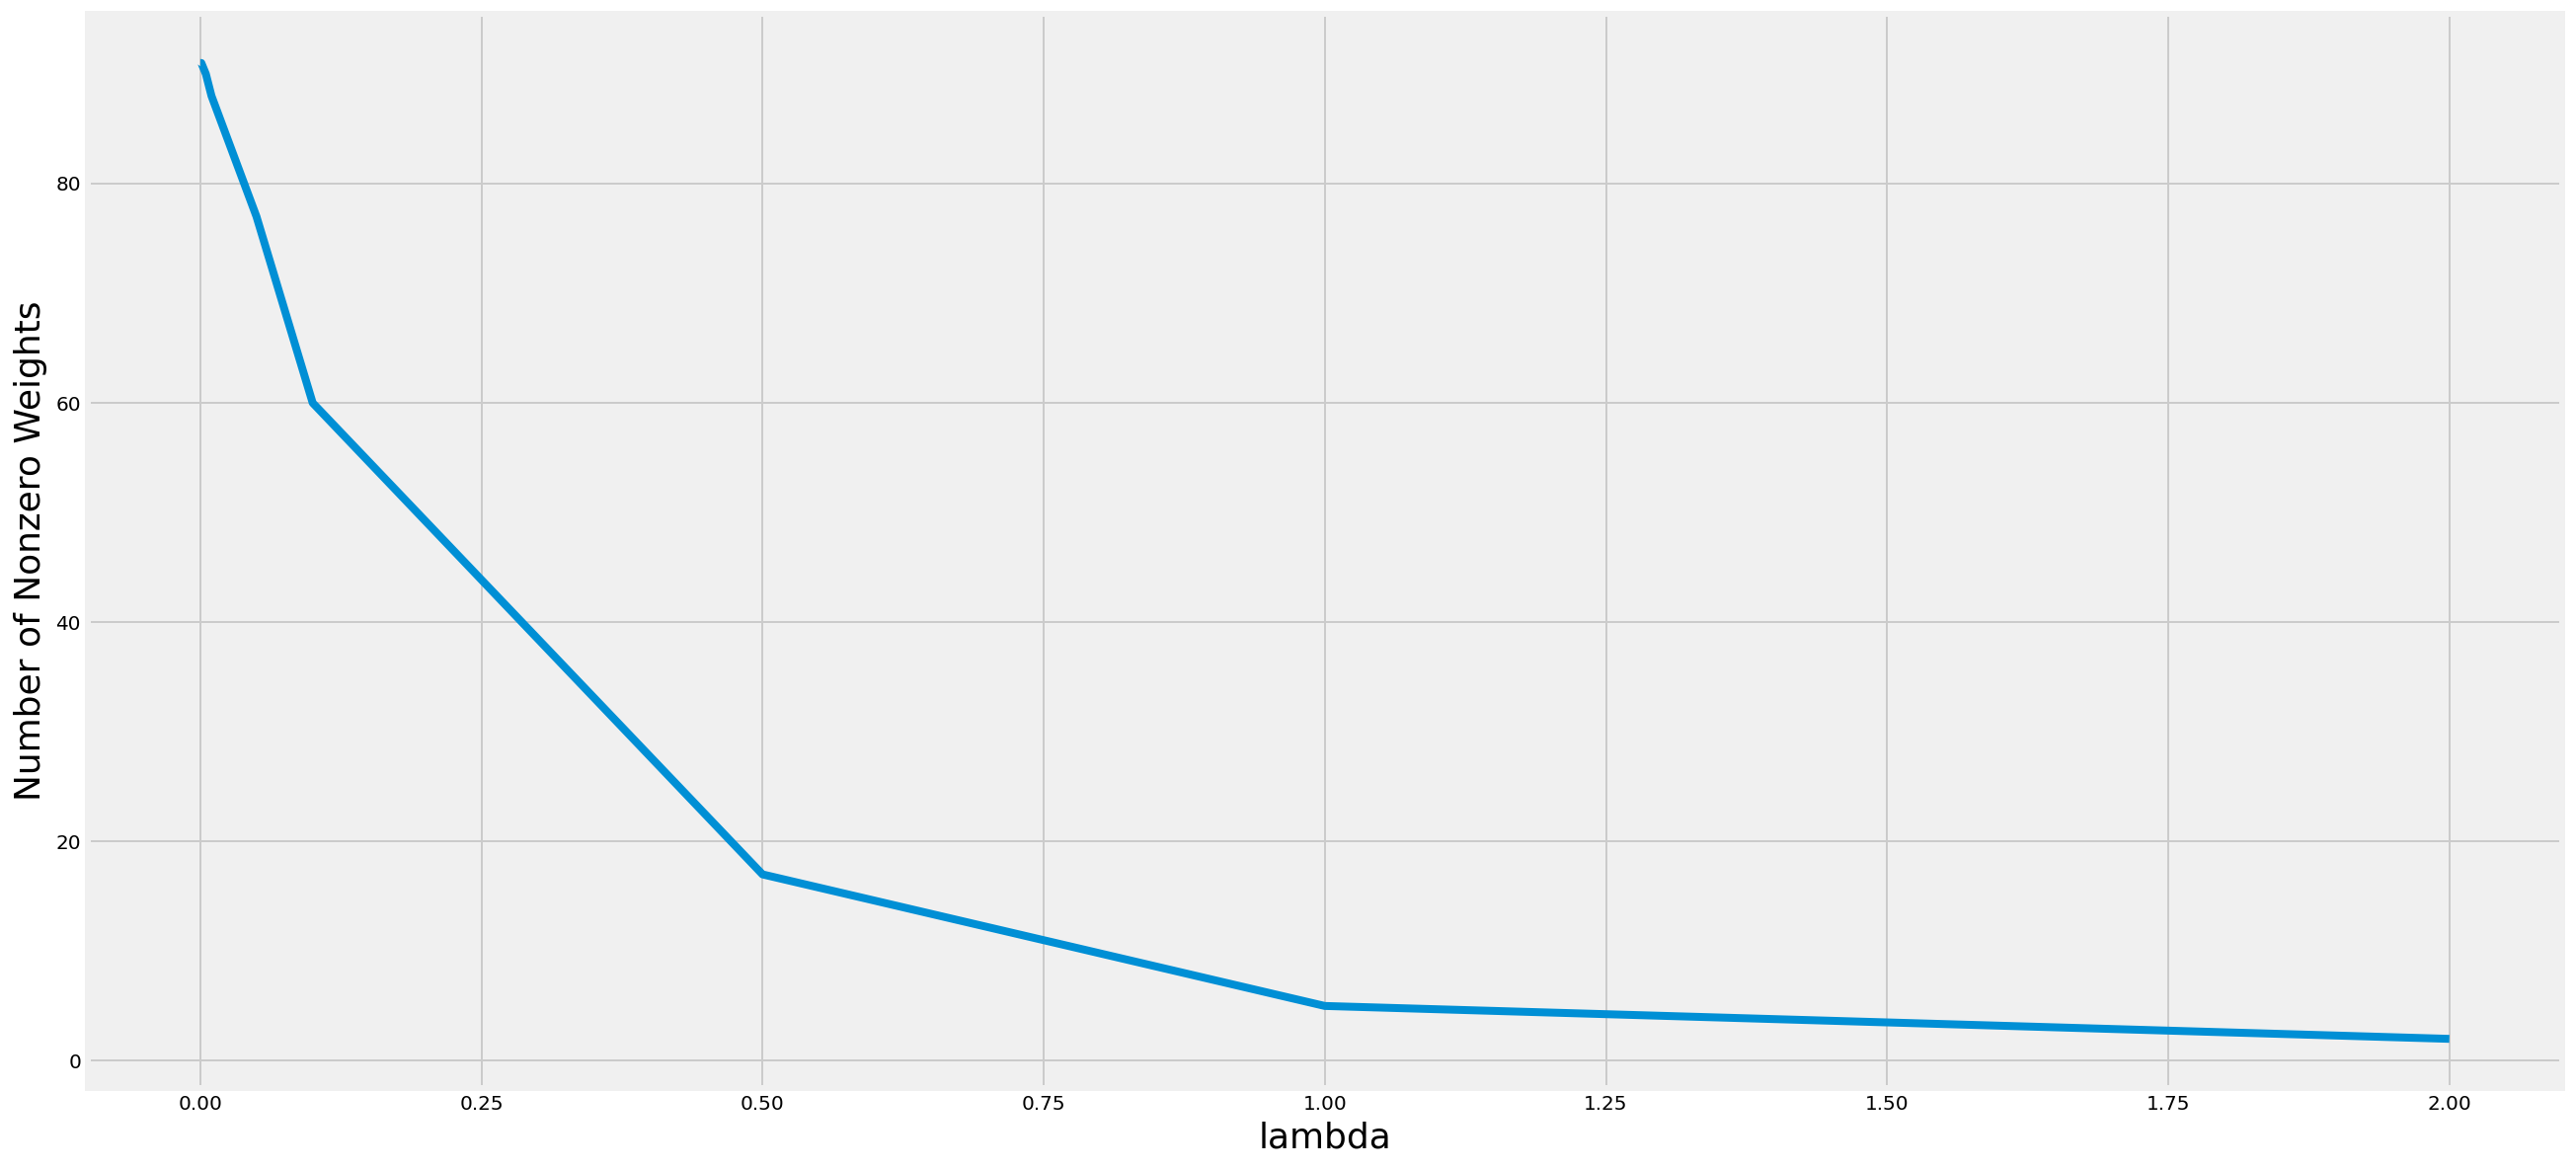

In [9]:
plt.figure(figsize=(20, 10))
plt.plot(lambda_list, nonZero)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Number of Nonzero Weights', fontsize=18)

Number of Nonzero Weights也隨著lambda上升而減少，因為模型會傾向將權重分散，而不是集中在特定的feature上。

In [16]:
'''
Average Weight Size (Mean of Absolute Weight)
'''
for i in range(len(lambda_list)):
    print("When lambda =",lambda_list[i],"Average Weight Size (Mean of Absolute Weight) =",AWS[i])

When lambda = 0.0001 Average Weight Size (Mean of Absolute Weight) = 22.42411287690552
When lambda = 0.0005 Average Weight Size (Mean of Absolute Weight) = 22.42326911609755
When lambda = 0.001 Average Weight Size (Mean of Absolute Weight) = 22.421718439463387
When lambda = 0.005 Average Weight Size (Mean of Absolute Weight) = 22.409649872336963
When lambda = 0.01 Average Weight Size (Mean of Absolute Weight) = 22.396892103458537
When lambda = 0.05 Average Weight Size (Mean of Absolute Weight) = 22.318394551258756
When lambda = 0.1 Average Weight Size (Mean of Absolute Weight) = 22.249524117459124
When lambda = 0.5 Average Weight Size (Mean of Absolute Weight) = 22.072184687494474
When lambda = 1 Average Weight Size (Mean of Absolute Weight) = 21.989689528454683
When lambda = 2 Average Weight Size (Mean of Absolute Weight) = 21.941207724307116


Text(0, 0.5, 'Average Weight Size (Mean of Absolute Weight)')

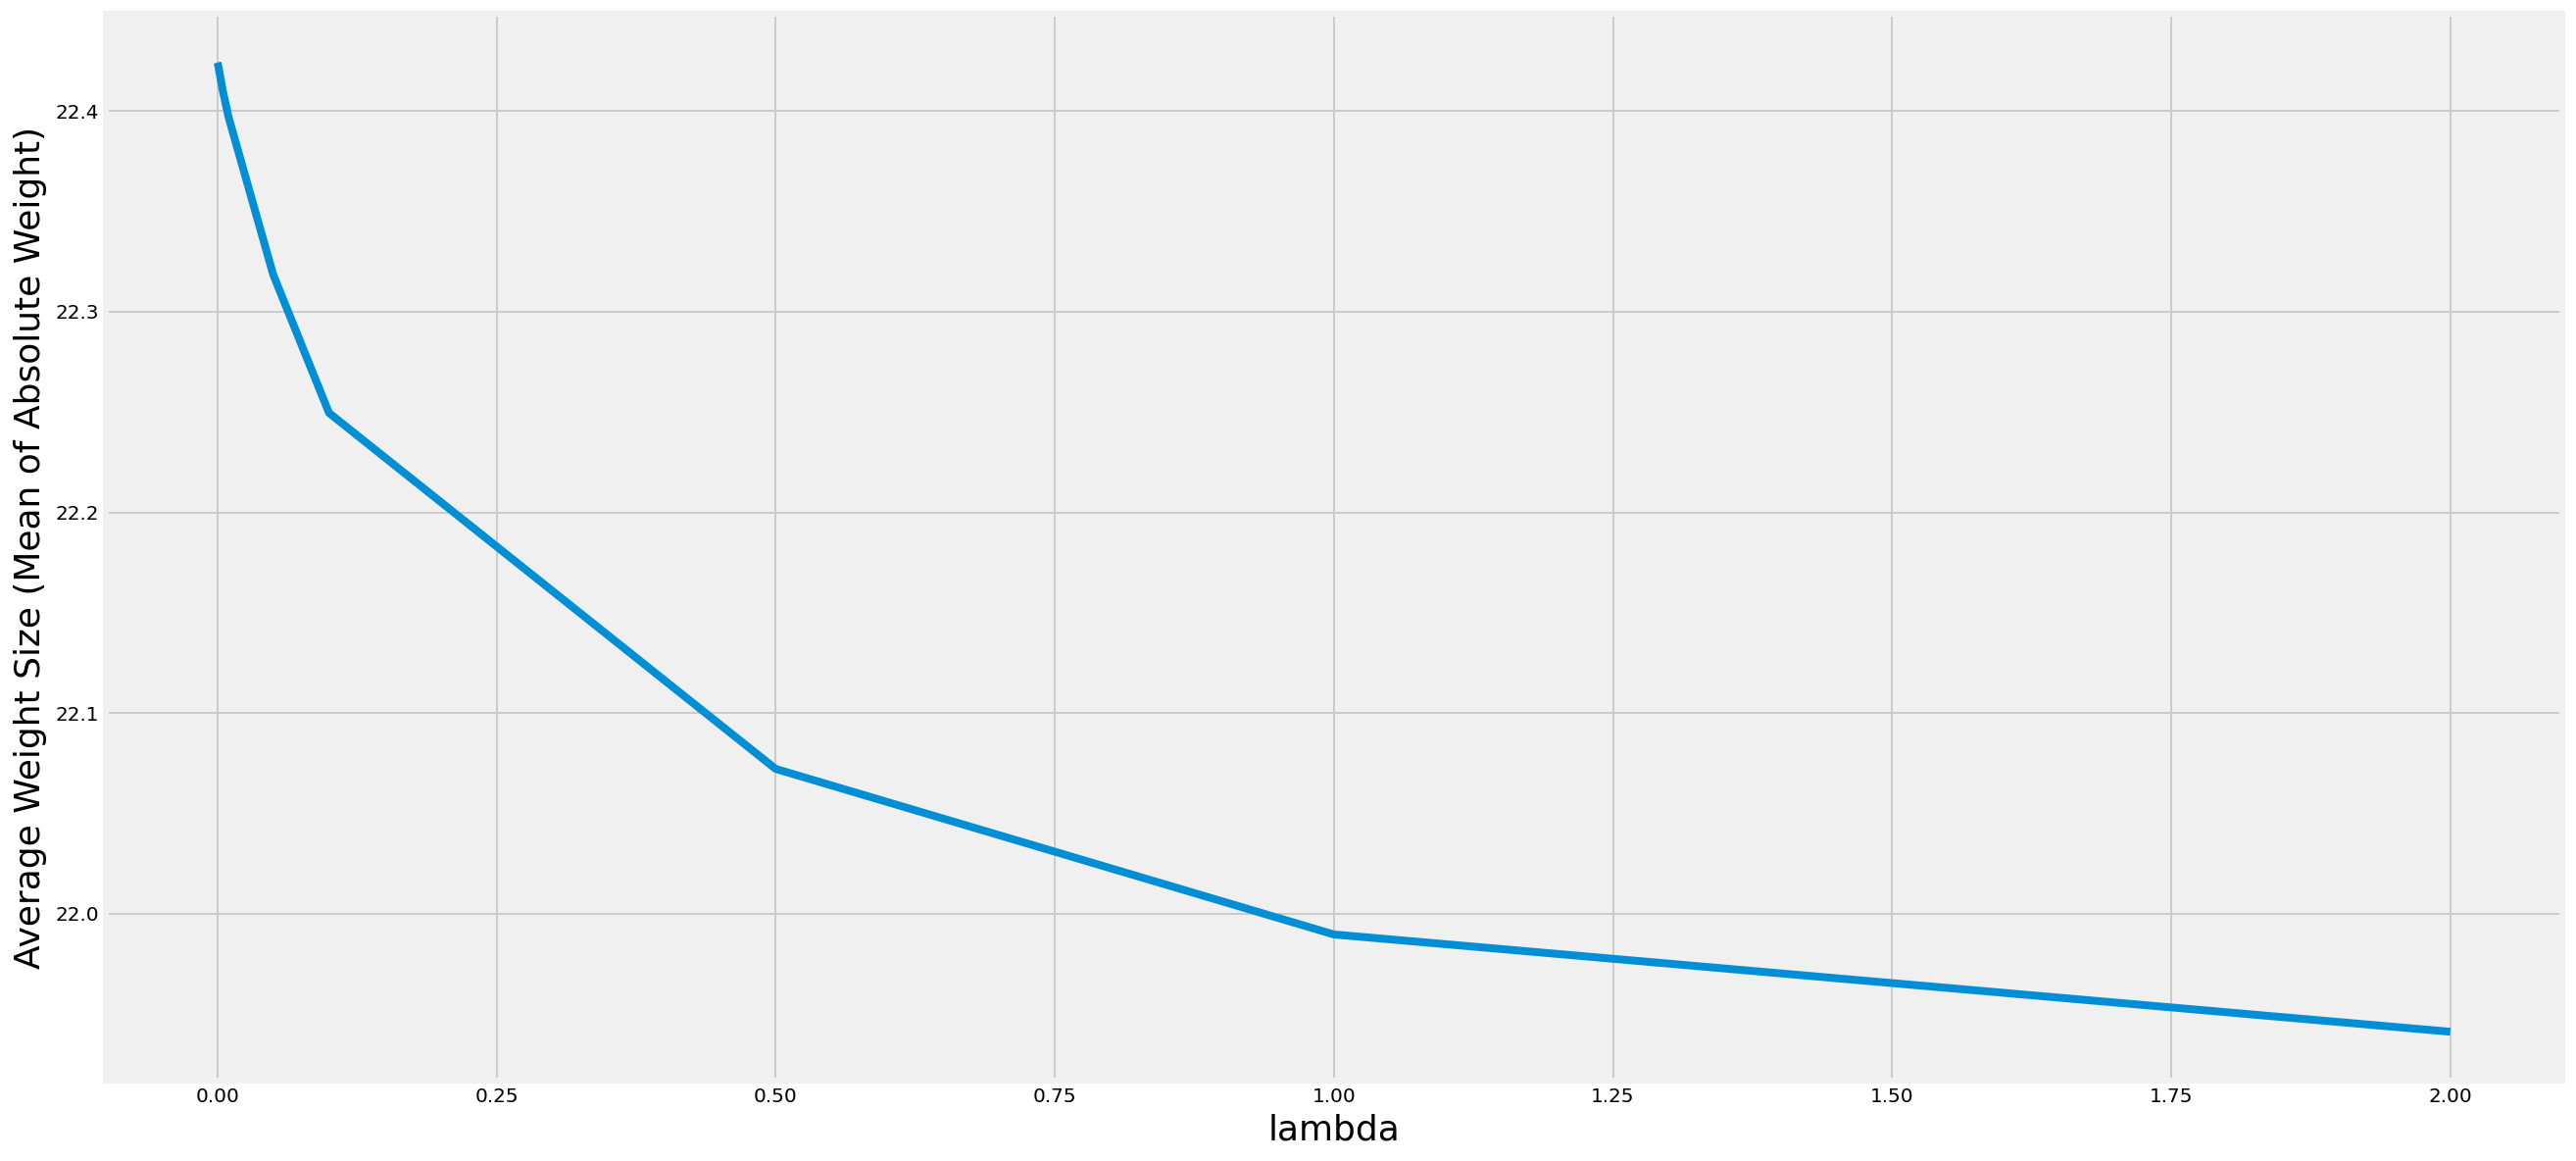

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(lambda_list, AWS)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Average Weight Size (Mean of Absolute Weight)', fontsize=18)

Average Weight Size (Mean of Absolute Weight)隨著lambda上升而下降，證明lambda提高真的會使模型傾向減少weight絕對值的總和。

In [17]:
'''
Training RMSE
'''
for i in range(len(lambda_list)):
    print("When lambda =",lambda_list[i],"Training RMSE =",trainRMSE[i])

When lambda = 0.0001 Training RMSE = 9.650515939518545
When lambda = 0.0005 Training RMSE = 9.65051828399201
When lambda = 0.001 Training RMSE = 9.650528397150026
When lambda = 0.005 Training RMSE = 9.650863461665228
When lambda = 0.01 Training RMSE = 9.651762892998876
When lambda = 0.05 Training RMSE = 9.672718808398466
When lambda = 0.1 Training RMSE = 9.720013849577956
When lambda = 0.5 Training RMSE = 10.109330830461793
When lambda = 1 Training RMSE = 10.63894511968178
When lambda = 2 Training RMSE = 11.200386194520627


Text(0, 0.5, 'Training RMSE')

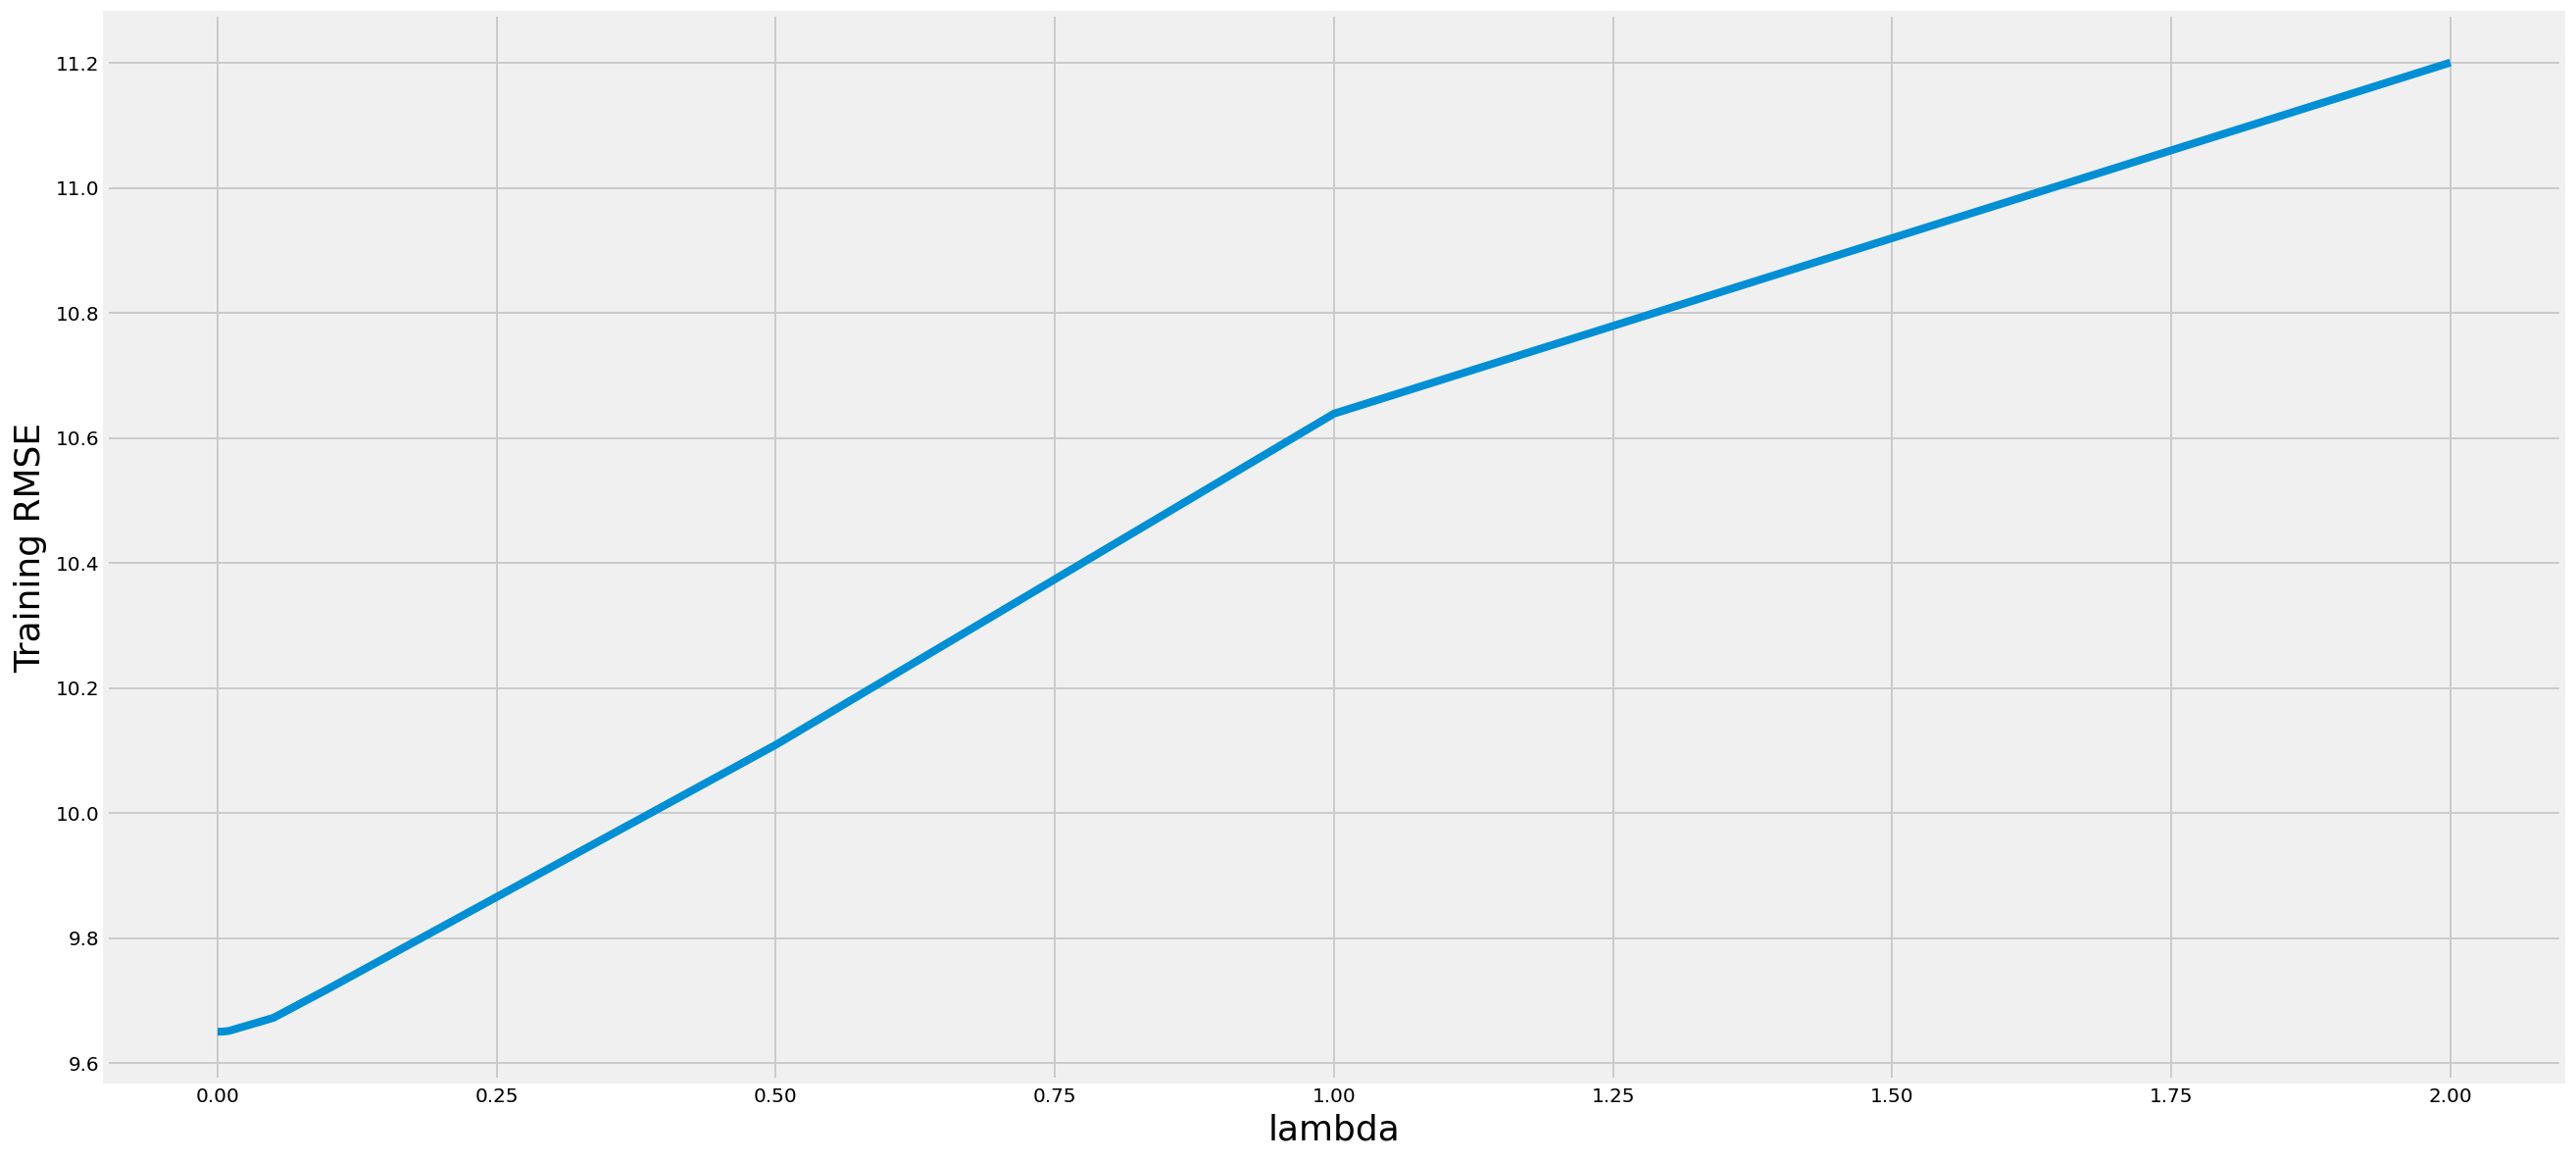

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(lambda_list, trainRMSE)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Training RMSE', fontsize=18)

In [18]:
'''
Test RMSE
'''
for i in range(len(lambda_list)):
    print("When lambda =",lambda_list[i],"Test RMSE =",testRMSE[i])

When lambda = 0.0001 Test RMSE = 9.644271814455832
When lambda = 0.0005 Test RMSE = 9.644061445020654
When lambda = 0.001 Test RMSE = 9.643576699043654
When lambda = 0.005 Test RMSE = 9.640119120005542
When lambda = 0.01 Test RMSE = 9.636509519304377
When lambda = 0.05 Test RMSE = 9.627056853639012
When lambda = 0.1 Test RMSE = 9.650076106752213
When lambda = 0.5 Test RMSE = 10.021194576420857
When lambda = 1 Test RMSE = 10.548060716447242
When lambda = 2 Test RMSE = 11.141073156238834


Text(0, 0.5, 'Test RMSE')

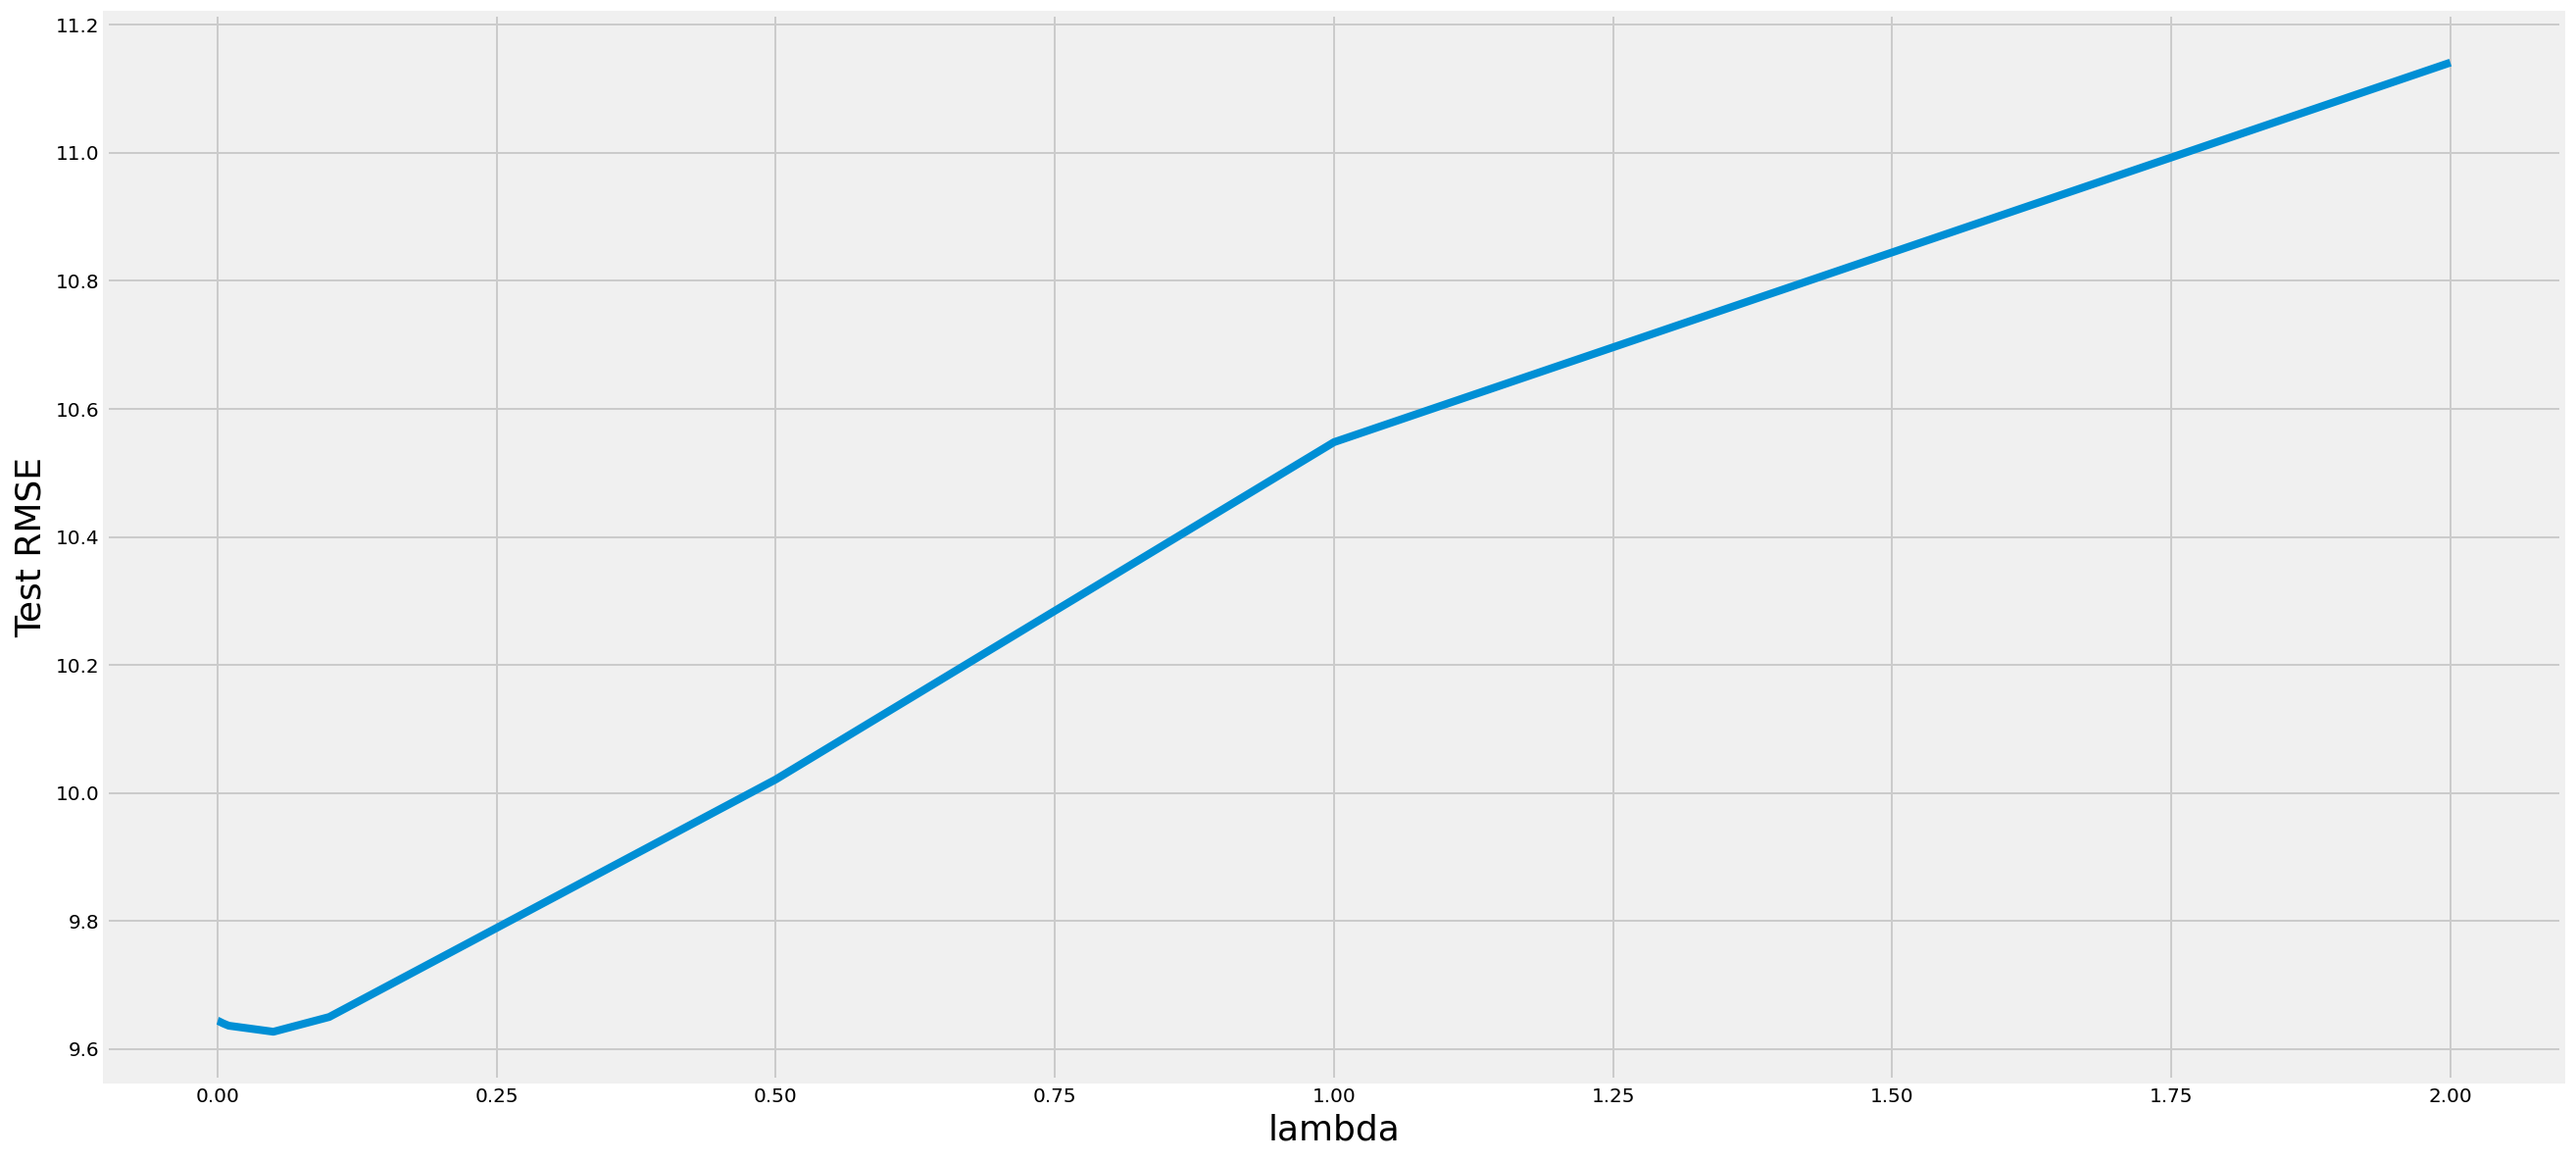

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(lambda_list, testRMSE)
plt.xlabel('lambda', fontsize=18)
plt.ylabel('Test RMSE', fontsize=18)

* Train和Test的表現大致上一致，可以得出模型的預測能力良好，基本上沒有太大的Overfitting的問題。
* 隨著lambda提升模型的RMSE也一起上升，意謂一味提高對權重的懲罰，反而使模型表現越來越差。
* lambda太小會Overfit，太大會Underfit。
* Test RMSE的最小值出現在0.005。
* 應針對不同的資料，選擇合適的lambda。